<a href="https://colab.research.google.com/github/AugustoSavi/Python-para-Ciencia-de-Dados-Formacao-Basica/blob/master/FiltrosComputacaoGrafica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho de filtros da disciplina de Computação Grafica**
Autor: [Augusto Savi](https://github.com/AugustoSavi)


## **Como usar?**
  - Para executar todas as celulas execute o comando: ```ctrl+f9``` ou no canto superior da tela em ```Ambiente de execução > Executar tudo```

  - Execução de uma unica celula basta clicar na celula e executar o comando ```ctrl+enter``` ou no canto superior direito da celula clique no botão de play (nesse caso lembre-se de sempre executar a primeira celula pois ela carrega as libs e funções usadas em todo o projeto)

## **Como ter uma copia para você**
  - Crie uma copia para o seu drive no canto superior em ```Arquivo > Salvar uma copia no Drive``` e você pode realizar as alterações que quiser e elas não serão perdidas


## **Você pode acessar os filtros diretamente pelos link abaixo:**

[Efeito Grid](#efeito_grid)

[Efeito Vermelho](#efeito_vermelho)

[Efeito Verde](#efeito_verde)

[Efeito Azul](#efeito_azul)

[Efeito Grid With Size](#efeito_grid_with_size)


In [83]:
import urllib.request
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import math

# open de image
urllib.request.urlretrieve("https://user-images.githubusercontent.com/32443720/136699863-85926cc0-28ab-4a2f-b199-d893ff6bfce4.jpg", "IMAGEM.jpg")
img = Image.open('IMAGEM.jpg')
pixel = img.load()
img = img.convert('RGB')

#size image
width = img.size[0]
height = img.size[1]
print('width: {0}, height: {1}'.format(width, height))

# função para mostrar o resultado do filtro
def showFilter(imageWithFilter):
  fig, axarr = plt.subplots(1,2)
  fig.suptitle('Filtro Aplicado')
  fig.set_size_inches(24,10)
  axarr[0].imshow(img)
  axarr[1].imshow(Image.fromarray(data, 'RGB'))


def truncate(x):
  # return value entre 0 e 255
  return min(255, max(0, x))


width: 332, height: 300


#<h1><a name="efeito_grid">Efeito gride</a></h1>

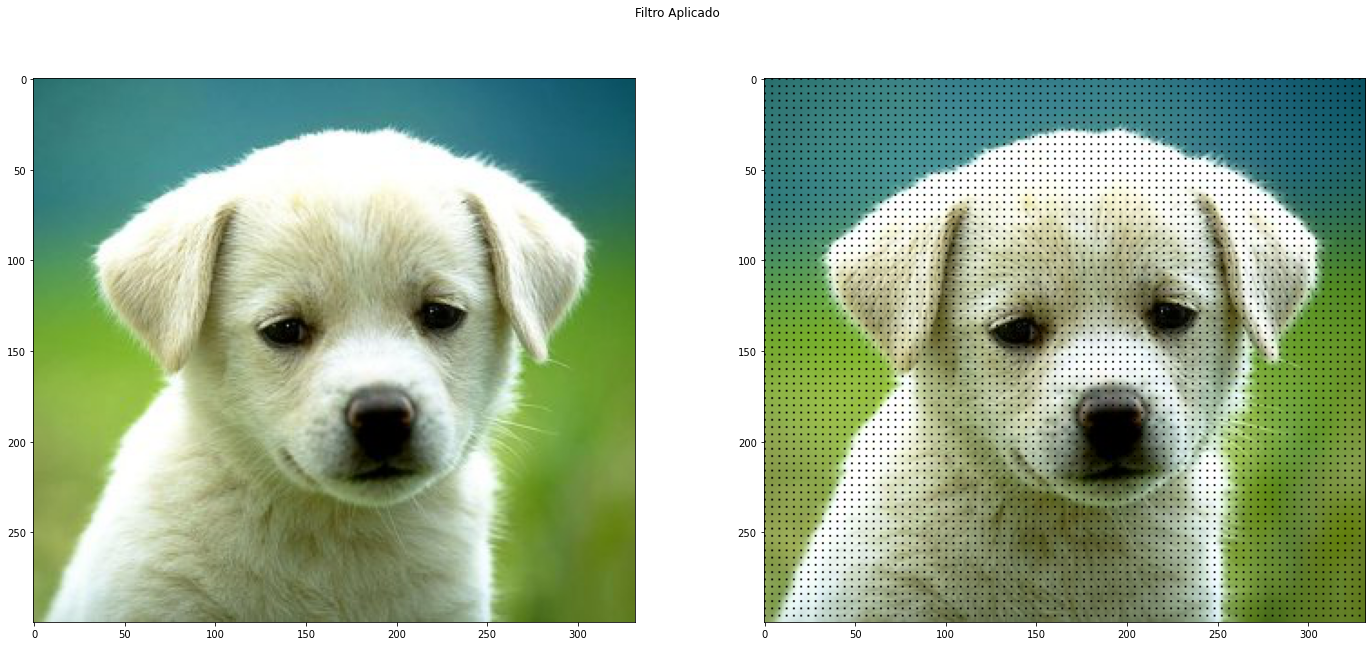

In [27]:
# Pega os dados da matriz rgb da imagem
data = np.array(img)

# Definindo a cor
black = (0,0,0)

# Loop Percorrendo a imagem
for i in range(0, height, 4):
  for j in range(0, width, 4):
       data[i,j] = black


# mostra imagem lado a lado
showFilter(data)


#<h1><a name="efeito_vermelho">Efeito Vermelho</a></h1>

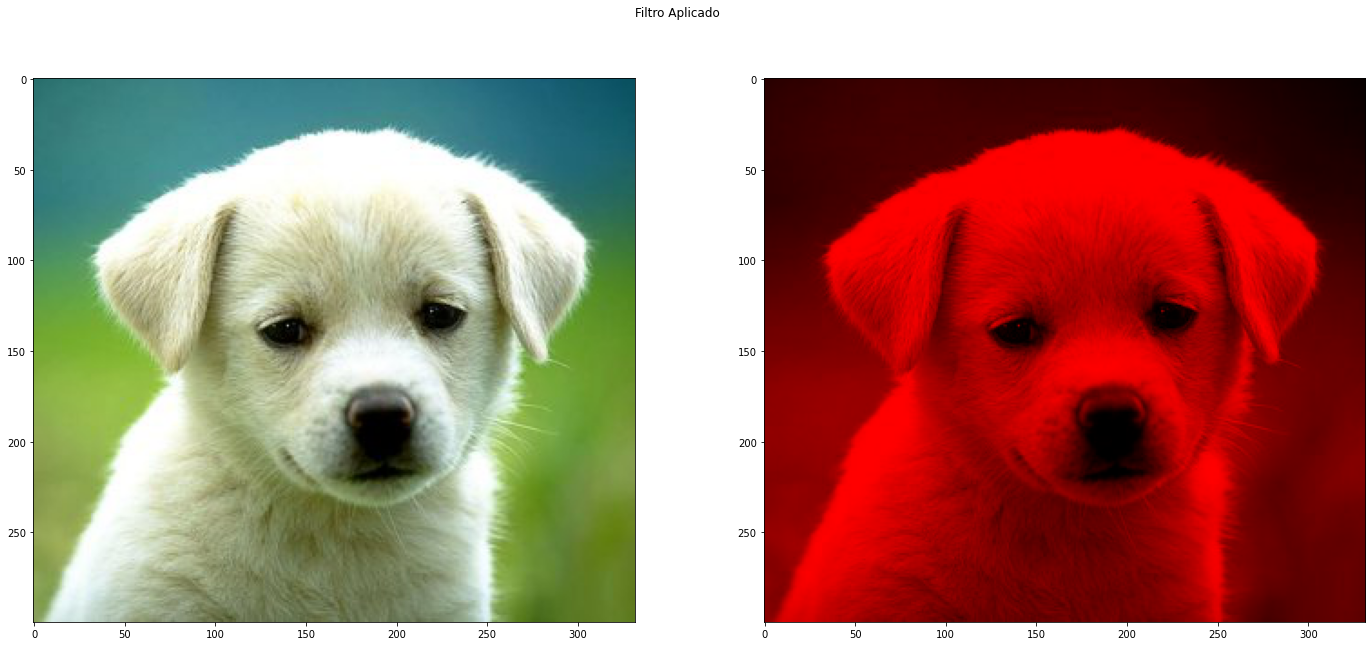

In [77]:
data = np.array(img)

for i in range(0, height):
  for j in range(0, width):
      R,G,B = img.getpixel((j, i))
      data[i,j] = (R,0,0)

# mostra imagem lado a lado
showFilter(data)

#<h1><a name="efeito_verde">Efeito verde</a><h1/>

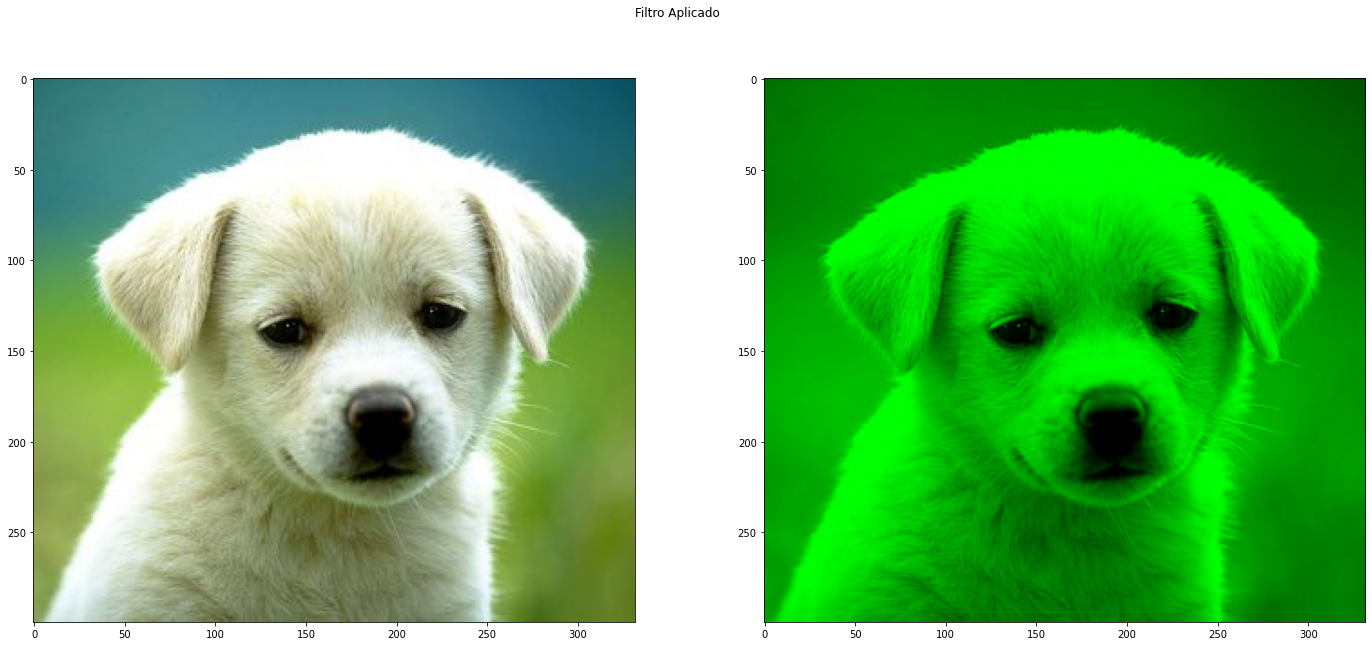

In [78]:
data = np.array(img)

for i in range(0, height):
  for j in range(0, width):
      R,G,B = img.getpixel((j, i))
      data[i,j] = (0,G,0)

# mostra imagem lado a lado
showFilter(data)

#<h1><a name="efeito_azul">Efeito Azul</a></h1>

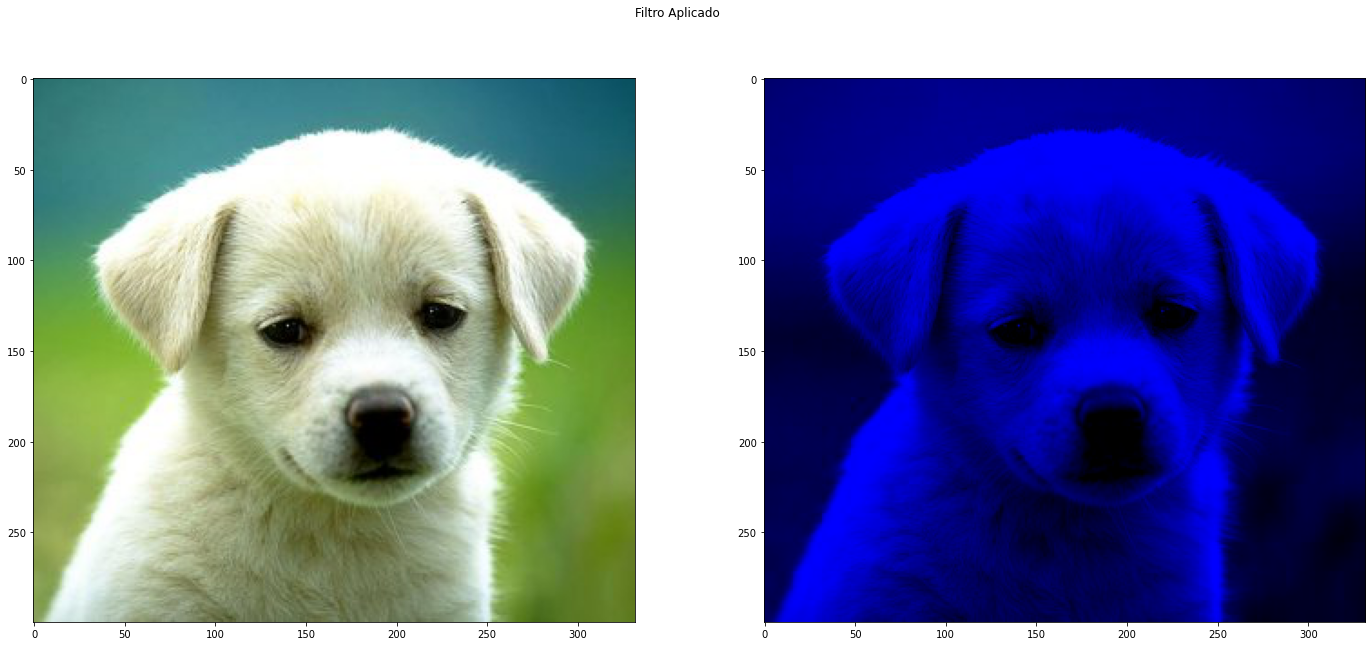

In [79]:
data = np.array(img)

for i in range(0, height):
  for j in range(0, width):
      R,G,B = img.getpixel((j, i))
      data[i,j] = (0,0,B)

# mostra imagem lado a lado
showFilter(data)

#<h1><a name="efeito_grid_with_size">Efeito grid with Square size</a><h1>

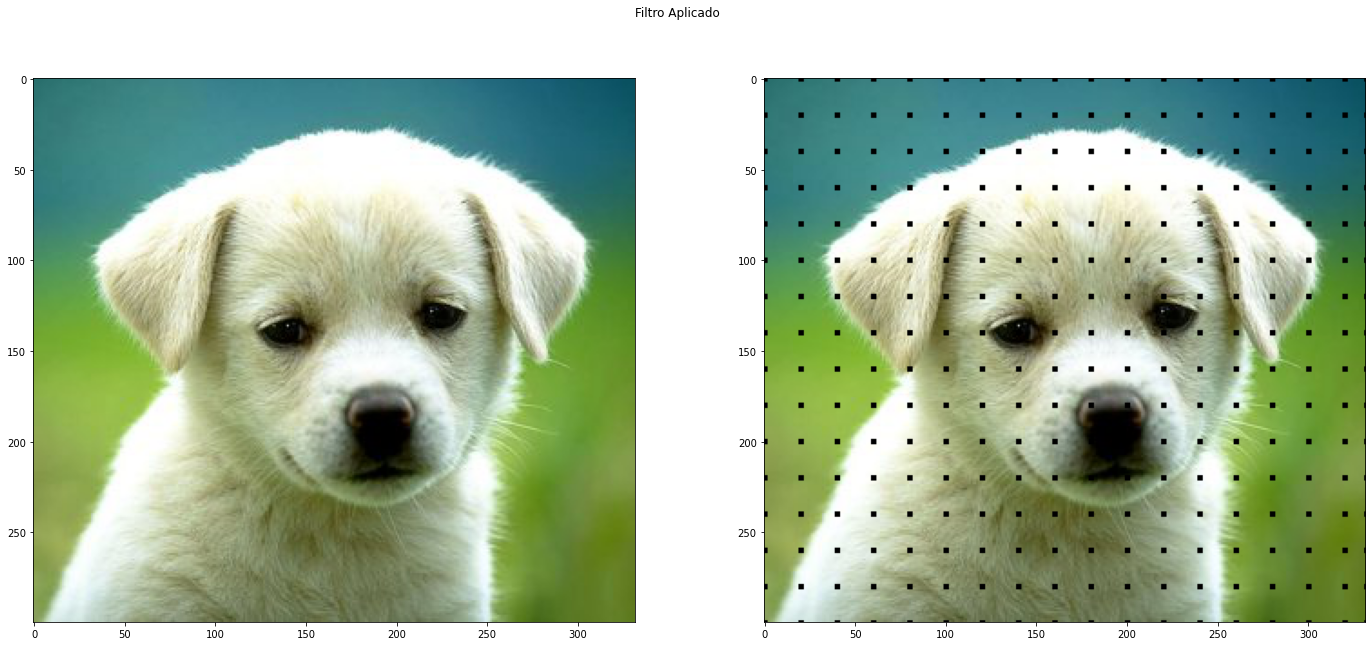

In [66]:
# Pega os dados da matriz rgb da imagem
data = np.array(img)

# Definindo a cor
black = (0,0,0)

# definindo tamanho do quadrado 
squareSize = 5

# distance min = 1
distance = 20

def surroundings(matrix, y, x, color, squareSize):
  squareSize = math.floor((squareSize/2))
  for size in range(0,squareSize):
    # himself:        
    drawInCell(matrix, y,         x,      color),
    # up:        
    drawInCell(matrix, y-size,    x,      color),
    # upRight:   
    drawInCell(matrix, y-size,    x+size, color),
    # right:     
    drawInCell(matrix, y,         x+size, color),
    # downRight: 
    drawInCell(matrix, y+size,    x+size, color),
    # down:      
    drawInCell(matrix, y+size,    x,      color),
    # downLeft:  
    drawInCell(matrix, y+size,    x-size, color),
    # left:      
    drawInCell(matrix, y,         x-size, color),
    # upLeft:    
    drawInCell(matrix, y-size,    x-size, color)


def drawInCell(matrix, y, x, color):
  try:
    if matrix[y][x] is not None:
      matrix[y][x] = color
  except IndexError:
    pass
    

# Loop Percorrendo a imagem
for i in range(0, height, distance):
  for j in range(0, width, distance):
      surroundings(data,i,j,black,squareSize)


# mostra imagem lado a lado
showFilter(data)


# Gray Scale

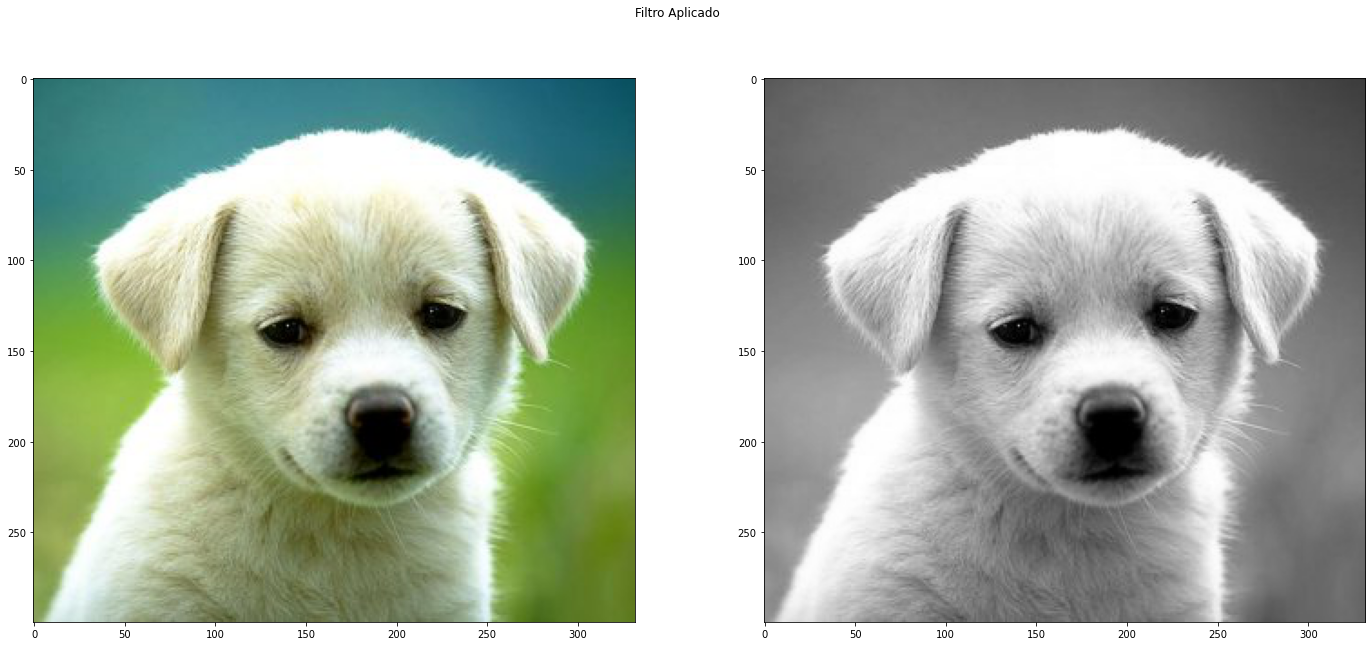

In [84]:
data = np.array(img)

for i in range(0, height):
  for j in range(0, width):
    r, g, b = img.getpixel((j, i))
    r_ = g_ = b_ = 0.299*r + 0.587*g + 0.114*b
    data[i,j] = (r_, g_, b_)

# mostra imagem lado a lado
showFilter(data)

# Brightness Linear

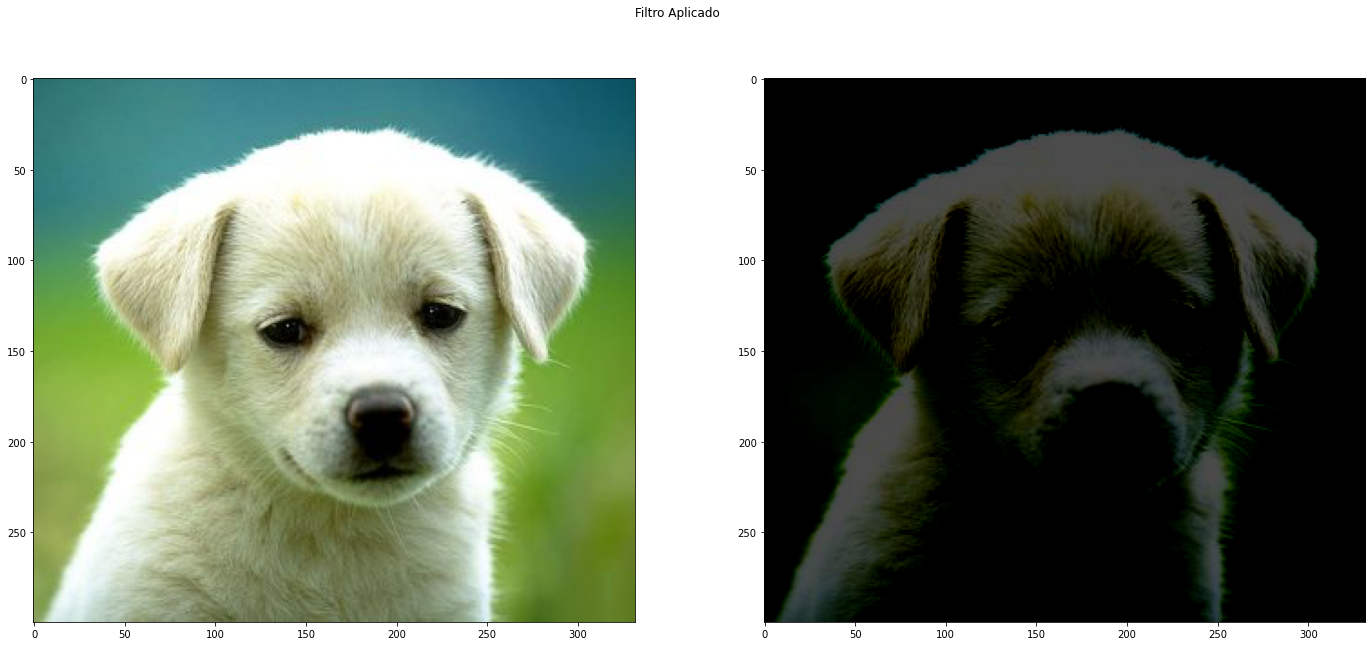

In [95]:
data = np.array(img)

brightness = -180

for i in range(0, height):
  for j in range(0, width):
    r, g, b = img.getpixel((j, i))

    r_ = truncate(r + brightness)
    g_ = truncate(g + brightness)
    b_ = truncate(b + brightness)

    data[i,j] = (r_, g_, b_)

# mostra imagem lado a lado
showFilter(data)

# Brightness Exponencial

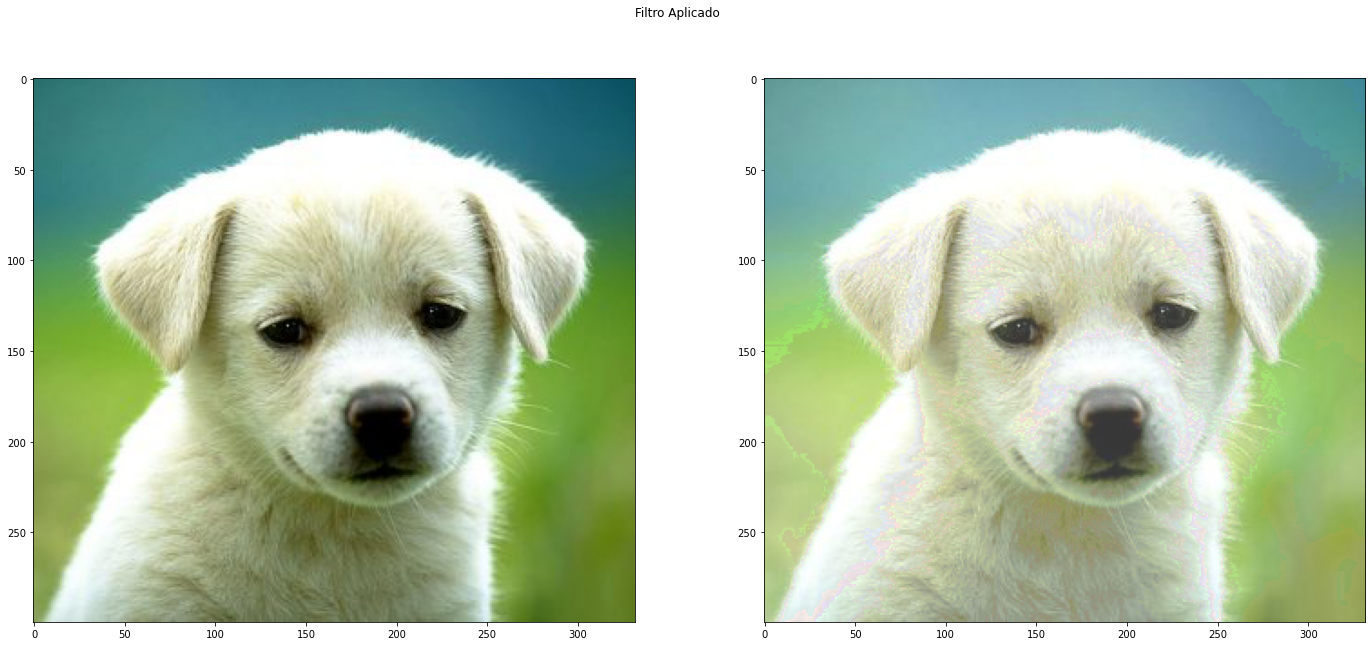

In [128]:
data = np.array(img)


def brightnessExponencial(colorValue, brightness):
  if colorValue > 0 and colorValue < 100:
    return colorValue + brightness
  
  if colorValue > 101 and colorValue < 170:
    return colorValue + round((brightness * 0.75))
  
  if colorValue > 171 and colorValue < 215:
    return colorValue + round((brightness * 0.5))
  
  if colorValue > 216 and colorValue < 255:
    return colorValue + round((brightness * 0.01))
  
  return colorValue + brightness


brightness = 55 #@param {type:"slider", min:-100, max:100, step:1}

for i in range(0, height):
  for j in range(0, width):
    r, g, b = img.getpixel((j, i))

    r_ = truncate(brightnessExponencial(r, brightness))
    g_ = truncate(brightnessExponencial(g, brightness))
    b_ = truncate(brightnessExponencial(b, brightness))

    data[i,j] = (r_, g_, b_)

# mostra imagem lado a lado
showFilter(data)

# Brightness Exponencial Teste

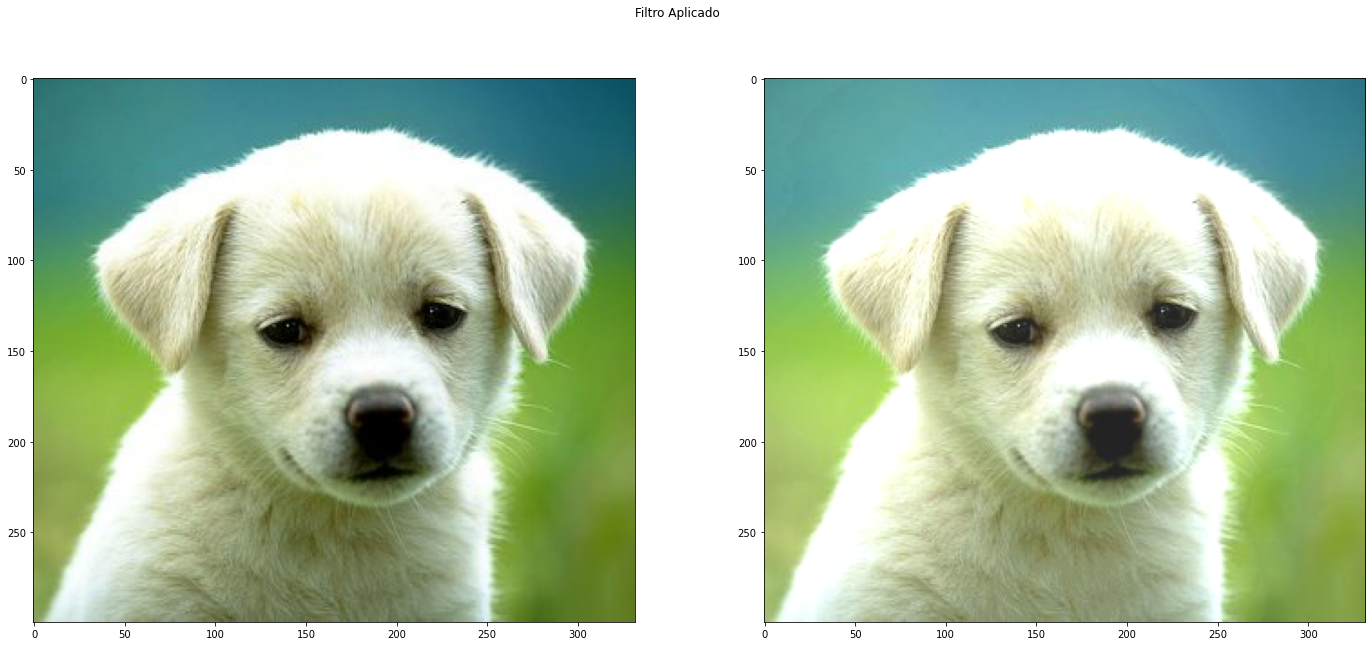

In [155]:
data = np.array(img)

def brightnessExponencial(r, g, b, brightness, ajustemedia1, ajustemedia2, ajustemedia3):
  media = (r+g+b)/3

  if media > 0 and media < 100:
    return r + brightness, g + brightness, b + brightness
  
  #ajustemedia1
  if media > 101 and media < 170:
    return r + round((brightness * (ajustemedia1/100))), g + round((brightness * (ajustemedia1/100))), b + round((brightness * (ajustemedia1/100)))
  
  #ajustemedia2
  if media > 171 and media < 215:
    return r + round((brightness * (ajustemedia2/100))), g + round((brightness * (ajustemedia2/100))), b + round((brightness * (ajustemedia2/100)))
  
  #ajustemedia3
  if media > 216 and media < 255:
    return r + round((brightness * (ajustemedia3/100))), g + round((brightness * (ajustemedia3/100))), b + round((brightness * (ajustemedia3/100)))
  
  return r + brightness, g + brightness, b + brightness



brightness = 34 #@param {type:"slider", min:-100, max:100, step:1}
ajustemedia1 = 86 #@param {type:"slider", min:0, max:100, step:1}
ajustemedia2 = 82 #@param {type:"slider", min:0, max:100, step:1}
ajustemedia3 = 77 #@param {type:"slider", min:0, max:100, step:1}

for i in range(0, height):
  for j in range(0, width):
    r, g, b = img.getpixel((j, i))
    r_, g_, b_ = brightnessExponencial(r,g,b, brightness, ajustemedia1, ajustemedia2, ajustemedia3)
    data[i,j] = (truncate(r_), truncate(g_), truncate(b_))

# mostra imagem lado a lado
showFilter(data)


